https://drive.google.com/file/d/16bxxJ6PJ4XeiY_cugxnqtDGmNamsQSVV/view?usp=share_link

In [1]:
! gdown --id 16bxxJ6PJ4XeiY_cugxnqtDGmNamsQSVV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16bxxJ6PJ4XeiY_cugxnqtDGmNamsQSVV
To: /content/archive.zip
100% 9.13k/9.13k [00:00<00:00, 26.0MB/s]


In [2]:
! unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: diabetes.csv            


In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [5]:
df = pd.read_csv('/content/diabetes.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.isna().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [10]:
df['Age_group'] = pd.qcut(df['Age'],5)

In [11]:
df.groupby('Age_group')['Outcome','BloodPressure'].agg(['count','mean'])

<ipython-input-11-648224ff6f98>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Age_group')['Outcome','BloodPressure'].agg(['count','mean'])


Outcome           BloodPressure           
                 count      mean         count       mean
Age_group                                                
(20.999, 23.0]     173  0.132948           173  64.658960
(23.0, 27.0]       159  0.238994           159  64.918239
(27.0, 33.0]       142  0.429577           142  67.000000
(33.0, 42.6]       140  0.457143           140  71.850000
(42.6, 81.0]       154  0.532468           154  77.870130

<Axes: xlabel='Age_group'>

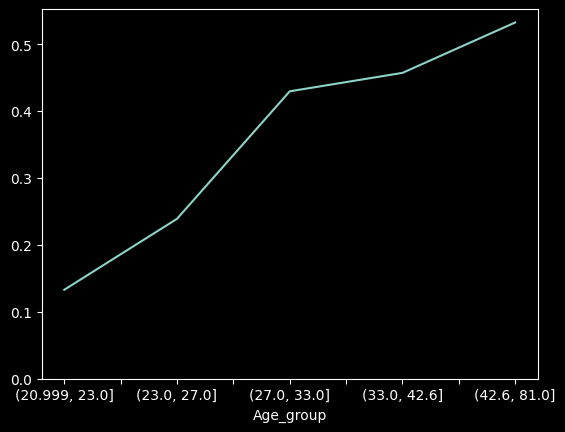

In [12]:
df.groupby('Age_group')['Outcome'].mean().plot(ylim=0)

In [13]:
df['BloodPressure_group'] = pd.qcut(df['BloodPressure'],5)

In [14]:
df.groupby('BloodPressure_group')['Outcome'].agg(['count','mean'])

,count,mean
BloodPressure_group,,
"(-0.001, 60.0]",158,0.246835
"(60.0, 68.0]",160,0.293750
"(68.0, 74.0]",153,0.366013
"(74.0, 82.0]",162,0.382716
"(82.0, 122.0]",135,0.474074


<Axes: xlabel='BloodPressure_group'>

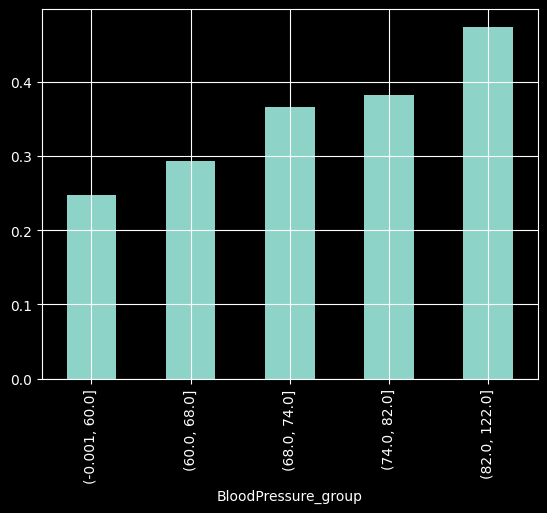

In [15]:
df.groupby('BloodPressure_group')['Outcome'].mean().plot(ylim=0, grid=True, kind= 'bar')

In [16]:
df[['Age','Outcome']].corr()

,Age,Outcome
Age,1.000000,0.238356
Outcome,0.238356,1.000000


In [17]:
! pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.1 MB/s eta 0:00:00


In [18]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [19]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [20]:
phik_overview

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group,BloodPressure_group
Pregnancies,1.000000,0.147507,0.100296,0.183777,0.000000,0.138248,0.000000,0.634490,0.307429,0.671382,0.256114
Glucose,0.147507,1.000000,0.138568,0.136627,0.282687,0.202447,0.094732,0.198778,0.488153,0.249886,0.202925
BloodPressure,0.100296,0.138568,1.000000,0.232074,0.000000,0.512407,0.000000,0.291258,0.199601,0.378191,0.973836
SkinThickness,0.183777,0.136627,0.232074,1.000000,0.372447,0.491141,0.333682,0.252763,0.278824,0.240567,0.124618
Insulin,0.000000,0.282687,0.000000,0.372447,1.000000,0.139973,0.496315,0.206671,0.208625,0.000000,0.000000
BMI,0.138248,0.202447,0.512407,0.491141,0.139973,1.000000,0.278092,0.156566,0.318172,0.167508,0.246246
DiabetesPedigreeFunction,0.000000,0.094732,0.000000,0.333682,0.496315,0.278092,1.000000,0.000000,0.227172,0.168790,0.000000
Age,0.634490,0.198778,0.291258,0.252763,0.206671,0.156566,0.000000,1.000000,0.407535,0.968392,0.405364
Outcome,0.307429,0.488153,0.199601,0.278824,0.208625,0.318172,0.227172,0.407535,1.000000,0.254945,0.117221
Age_group,0.671382,0.249886,0.378191,0.240567,0.000000,0.167508,0.168790,0.968392,0.254945,1.000000,0.443069


In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Heatmap correlation Phik (𝜙k)')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 120601 (\N{MATHEMATICAL ITALIC PHI SYMBOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120601 (\N{MATHEMATICAL ITALIC PHI SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


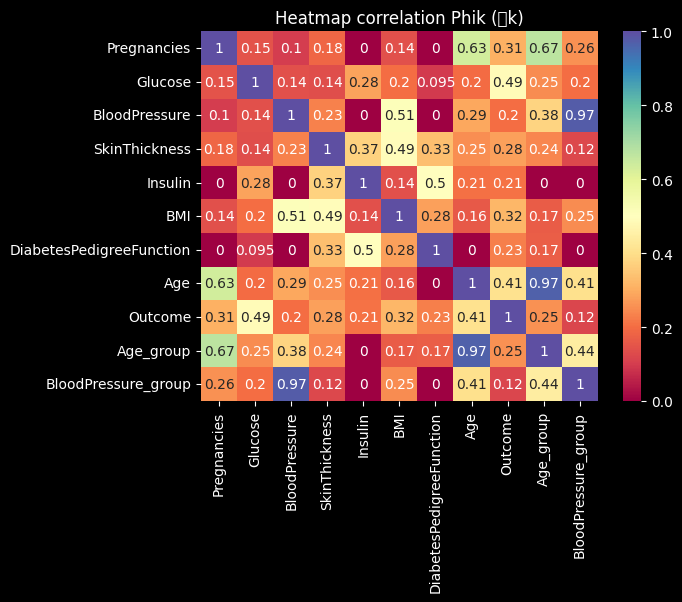

In [23]:
sns.heatmap(phik_overview, cmap='Spectral', annot=True)
plt.title('Heatmap correlation Phik (𝜙k)')

In [24]:
phik_overview['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.488153
Age                         0.407535
BMI                         0.318172
Pregnancies                 0.307429
SkinThickness               0.278824
Age_group                   0.254945
DiabetesPedigreeFunction    0.227172
Insulin                     0.208625
BloodPressure               0.199601
BloodPressure_group         0.117221
Name: Outcome, dtype: float64

In [25]:
df['Age_group'] = pd.qcut(df['Glucose'],5)

In [26]:
df.groupby('Age_group')['Outcome'].agg(['count','mean'])

,count,mean
Age_group,,
"(-0.001, 95.0]",160,0.087500
"(95.0, 109.0]",154,0.194805
"(109.0, 125.0]",157,0.305732
"(125.0, 147.0]",149,0.442953
"(147.0, 199.0]",148,0.743243


<Axes: xlabel='Age_group'>

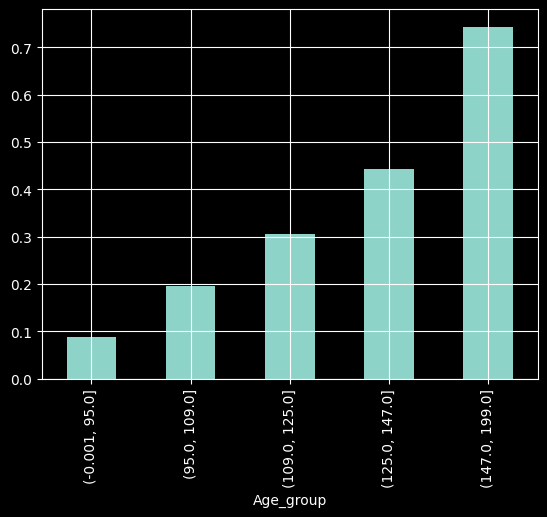

In [27]:
df.groupby('Age_group')['Outcome'].mean().plot(ylim=0, grid=True, kind= 'bar')